In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score, confusion_matrix
from scipy.stats import mode


In [3]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
sample_submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
sample_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
test["data"]="test"
train["data"]="train"

In [10]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test


In [11]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


#Decriptive Analytics
--------------------------


In [12]:
data=pd.concat([train,test])

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


#Assumption or Intuition
----------------------------

•	Understand the data
•	Passenger name  - Yes
•	Gender- Yes
•	Age- Yes
•	Address- No
•	Ticker number (id) - Yes
•	Passenger class - Yes
•	Cabin (seat Type) - Yes
•	Ticket Fare- Yes
•	Number of people travel along with them
o	Spouse- Yes
o	Sibling- Yes
o	Kids- Yes
o	Friends
•	where are they from? - Yes
•	Where are they going ? - No
•	Safe to reach destination - Yes


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [16]:
data[data.duplicated()].sum()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
data           0.0
dtype: float64

In [17]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [18]:
data[data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,test
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


# Exploratory Data Analysis
---------------------------------

### Univariate Analysis
------------------------------

<AxesSubplot:>

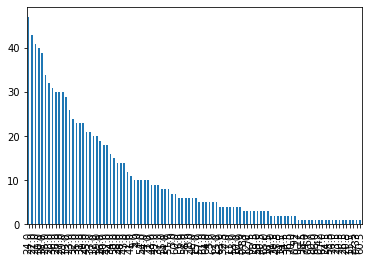

In [19]:
data['Age'].value_counts().plot(kind='bar')

<AxesSubplot:>

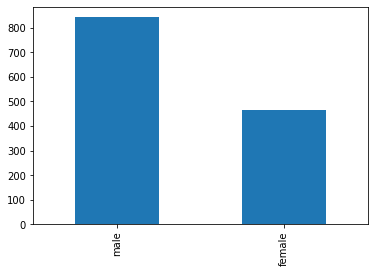

In [20]:
data['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

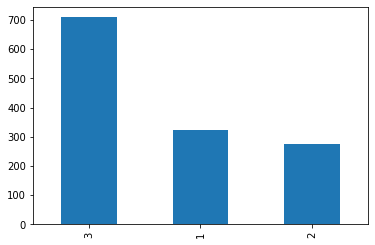

In [21]:
data["Pclass"].value_counts().plot(kind='bar')

<AxesSubplot:>

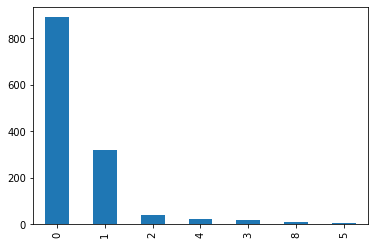

In [22]:
data["SibSp"].value_counts().plot(kind='bar')

<AxesSubplot:>

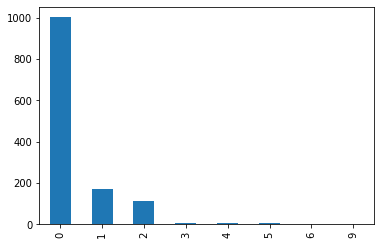

In [23]:
data["Parch"].value_counts().plot(kind='bar')

<AxesSubplot:>

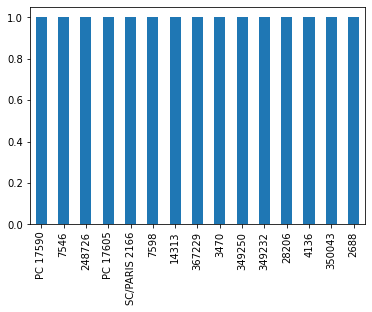

In [24]:
data["Ticket"].value_counts().sort_values().head(15).plot(kind='bar')

In [25]:
data["Ticket"].nunique()

929

<AxesSubplot:>

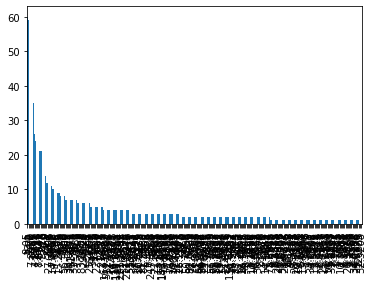

In [26]:
data["Fare"].value_counts().plot(kind='bar')

In [27]:
data[data["Fare"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


In [28]:
data["Cabin"].value_counts()


C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
F33                4
                  ..
E17                1
C28                1
B37                1
C132               1
C118               1
Name: Cabin, Length: 186, dtype: int64

In [29]:
data[data["Cabin"]=="C23 C25 C27"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,train
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,train
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,train
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,train
53,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S,test
69,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S,test


In [30]:
data[data["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [31]:
data[data["Ticket"]=="349909"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,train
24,25,0.0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,train
374,375,0.0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S,train
567,568,0.0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,train
389,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.075,NaN,S,test


In [32]:
data["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

<AxesSubplot:>

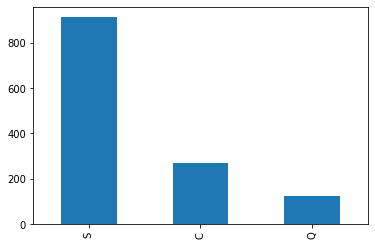

In [33]:
data["Embarked"].value_counts().plot(kind='bar')

In [34]:
data[data["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train


In [35]:
data[data["Ticket"]=="113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train


#Bivariant 
------------------------


In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'data'],
      dtype='object')

In [37]:
data[data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,test
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


<AxesSubplot:xlabel='Fare'>

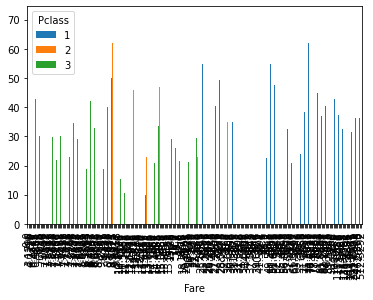

In [38]:
data.pivot_table(values="Age", index = "Fare", columns = "Pclass").plot(kind='bar')

<AxesSubplot:>

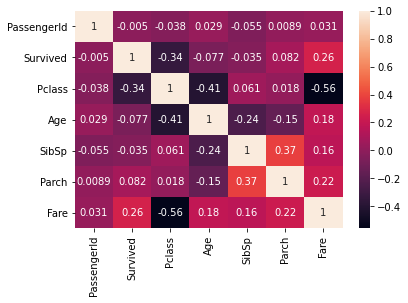

In [39]:
sns.heatmap(data.corr(),annot=True)

#Data Pre-Proessing
----------------------------

#•	Fare – 1 null: - Check train or test and then remove if required. Else update fare group by age—we couldn’t remove as this is test data and 

In [40]:
data[data["Fare"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


In [41]:
data[data["Ticket"]=="3701"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


In [42]:
 data.pivot_table(values="Fare", index = "Pclass",aggfunc='mean')

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [43]:
 data.pivot_table(values="Fare", index = "Pclass",columns="Age",aggfunc='mean')

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,...,64.00,65.00,66.00,67.00,70.00,70.50,71.00,74.00,76.00,80.00
Pclass,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,151.55,NaN,151.550000,NaN,...,94.79166,44.2646,NaN,221.7792,71.0,NaN,42.0792,NaN,78.85,30.0
2,NaN,NaN,NaN,14.5,NaN,23.875,27.75,39.194467,25.000000,28.776400,...,NaN,NaN,10.5,NaN,10.5,NaN,NaN,NaN,NaN,NaN
3,20.575,14.4,8.5167,NaN,17.430533,9.350,NaN,23.274400,24.003125,20.534375,...,NaN,7.7500,NaN,NaN,NaN,7.75,NaN,7.775,NaN,NaN


In [44]:
data.pivot_table(values="Fare", index = "Pclass", aggfunc=(lambda x: mode(x).mode[0]))

,Fare
Pclass,
1,26.55
2,13.00
3,8.05


In [45]:
data.pivot_table(values="Fare", index = "Pclass",columns="Age", aggfunc=(lambda x: mode(x).mode[0]))

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,...,64.00,65.00,66.00,67.00,70.00,70.50,71.00,74.00,76.00,80.00
Pclass,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,151.55,NaN,151.5500,NaN,...,26.0,26.55,NaN,221.7792,71.0,NaN,34.6542,NaN,78.85,30.0
2,NaN,NaN,NaN,14.5,NaN,18.75,27.75,37.0042,26.0000,18.750,...,NaN,NaN,10.5,NaN,10.5,NaN,NaN,NaN,NaN,NaN
3,20.575,14.4,8.5167,NaN,19.2583,9.35,NaN,11.1333,10.4625,13.775,...,NaN,7.75,NaN,NaN,NaN,7.75,NaN,7.775,NaN,NaN


In [46]:
data["Fare"].replace({np.nan:7.75},inplace=True)

In [47]:
data[data["Ticket"]=="3701"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.75,NaN,S,test


•	Age – 263 null : Mean of Age and group by fare and Pclass, check pach, sib is available for null age. First replace null into 0

In [48]:
data[data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,test
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [49]:
data.groupby((data['Fare']<=8.4583) & (data["Pclass"] ==3)).Age.mean().sort_values(ascending=False)

False    30.632861
True     27.794224
Name: Age, dtype: float64

In [50]:
   data[(data['Fare']==8.4583) & (data["Pclass"] ==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train


In [51]:
data["Age"].isna().sum()


263

In [52]:
data["Age"]=data.groupby("Sex").Age.transform(lambda x: x.fillna(x.mean()))

In [53]:
  data[(data['Fare']==8.4583) & (data["Pclass"] ==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
5,6,0.0,3,"Moran, Mr. James",male,30.585228,0,0,330877,8.4583,NaN,Q,train


In [54]:
  data[(data['Age']==0) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data


In [55]:
data[(data['Age'].isna()) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data


#•	Embarked -2 null – check sibling / child are available , also find with ticket number. We can remove this data. As no sib/child available and no other passenger travel with same ticket #. This is train data  we can drop them

In [56]:
data[data["Embarked"].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train


In [57]:
data[data["Ticket"]=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train


In [58]:
data.groupby("Embarked").Fare.mean()

Embarked
C    62.336267
Q    12.409012
S    27.397304
Name: Fare, dtype: float64

In [59]:
data.dropna(subset=['Embarked'],inplace=True)

In [60]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,0,0,359309,8.0500,NaN,S,test


#Cabin -1014 null : Group by age,sib/child ,fare and plcass , add mode of that --- Replace to Unknown
__________________________________________________________________________________________________________

In [61]:
data[data["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,train
5,6,0.0,3,"Moran, Mr. James",male,30.585228,0,0,330877,8.4583,NaN,Q,train
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,347086,7.7750,NaN,S,test
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,0,0,A.5. 3236,8.0500,NaN,S,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,0,0,359309,8.0500,NaN,S,test


In [62]:
data["Cabin"].nunique()

185

In [63]:
data.pivot_table(values="Cabin", index = "Ticket", aggfunc=(lambda x: mode(x).mode[0]))

,Cabin
Ticket,
110152,B77
110413,E67
110465,A14
110469,C106
110489,D22
...,...
W./C. 6608,0
W./C. 6609,0
W.E.P. 5734,E31


In [64]:
data["Cabin"].fillna("Unknown",inplace=True)

In [65]:
data[data["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data


# Grouping
--------------------

In [66]:
data["Cabin"].value_counts()

Unknown            1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F2                    4
                   ... 
A24                   1
E17                   1
C28                   1
B37                   1
C118                  1
Name: Cabin, Length: 186, dtype: int64

In [67]:
data["Cabin_group"] = data["Cabin"].apply(lambda x : x[0:1])

In [68]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data,Cabin_group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,train,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,train,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,train,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,train,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,train,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.585228,0,0,A.5. 3236,8.0500,Unknown,S,test,U
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,test,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,test,U
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.585228,0,0,359309,8.0500,Unknown,S,test,U


In [69]:
data["Cabin_group"].value_counts()

U    1014
C      94
B      63
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_group, dtype: int64

In [70]:
data["Sex"]=data["Sex"].replace({'male':1,'female':0})

In [71]:
data["Embarked"].value_counts()     

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [72]:
data["Embarked"]=data["Embarked"].replace({'S':1,'C':2,'Q':3})

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   int64  
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        1307 non-null   object 
 11  Embarked     1307 non-null   int64  
 12  data         1307 non-null   object 
 13  Cabin_group  1307 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 185.5+ KB


In [74]:
data.apply(lambda x: print(x.value_counts()))

1       1
861     1
879     1
878     1
877     1
       ..
436     1
435     1
434     1
433     1
1309    1
Name: PassengerId, Length: 1307, dtype: int64
0.0    549
1.0    340
Name: Survived, dtype: int64
3    709
1    321
2    277
Name: Pclass, dtype: int64
Kelly, Mr. James                         2
Connolly, Miss. Kate                     2
Toomey, Miss. Ellen                      1
Partner, Mr. Austen                      1
Wiklund, Mr. Karl Johan                  1
                                        ..
Assaf Khalil, Mrs. Mariana (Miriam")"    1
Compton, Mr. Alexander Taylor Jr         1
Osen, Mr. Olaf Elon                      1
Rice, Mrs. William (Margaret Norton)     1
Zabour, Miss. Thamine                    1
Name: Name, Length: 1305, dtype: int64
1    843
0    464
Name: Sex, dtype: int64
30.585228    185
28.687088     78
24.000000     47
22.000000     43
21.000000     41
            ... 
20.500000      1
11.500000      1
76.000000      1
0.330000       1
60.500000      

PassengerId    None
Survived       None
Pclass         None
Name           None
Sex            None
Age            None
SibSp          None
Parch          None
Ticket         None
Fare           None
Cabin          None
Embarked       None
data           None
Cabin_group    None
dtype: object

#Not required

In [75]:
data = data.reset_index().drop(columns="index")

<AxesSubplot:>

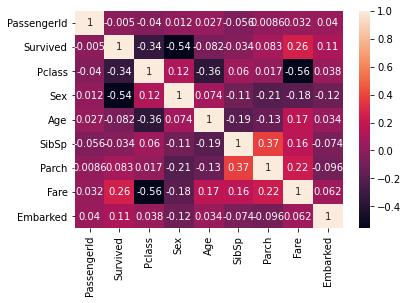

In [76]:
sns.heatmap(data.corr(),annot=True)

#Data Preparation
------------------------

In [77]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data,Cabin_group
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,Unknown,1,train,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,2,train,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,1,train,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,1,train,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,Unknown,1,train,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,1305,NaN,3,"Spector, Mr. Woolf",1,30.585228,0,0,A.5. 3236,8.0500,Unknown,1,test,U
1303,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,2,test,C
1304,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,1,test,U
1305,1308,NaN,3,"Ware, Mr. Frederick",1,30.585228,0,0,359309,8.0500,Unknown,1,test,U


In [78]:

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'data', 'Cabin_group'],
      dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   int64  
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        1307 non-null   object 
 11  Embarked     1307 non-null   int64  
 12  data         1307 non-null   object 
 13  Cabin_group  1307 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 143.1+ KB


In [80]:
numeric_data_columns=data.select_dtypes(include=np.number).drop(columns=["Survived"]).columns

In [81]:
numeric_data_columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [82]:
category_data_columns=data.select_dtypes(exclude=np.number).drop(columns=["data","Name","Cabin"]).columns

In [83]:
category_data_columns

Index(['Ticket', 'Cabin_group'], dtype='object')

In [84]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [85]:
scaler = StandardScaler()


In [86]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [87]:
#final_preprocessed = pd.concat([preprocess_category_data_columns, data[numeric_data_columns], data[["data","Survived","PassengerId"]]], axis = 1)

In [88]:
#final_preprocessed = pd.concat([preprocess_category_data_columns,preprocess_numeric_data_columns, data[["data","Survived"]]], axis = 1)

In [89]:
final_preprocessed = pd.concat([preprocess_numeric_data_columns, data[["data","Survived"]]], axis = 1)

In [90]:
final_preprocessed

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,data,Survived
0,-1.732024,0.840447,0.741900,-0.612582,0.480272,-0.445407,-0.501718,-0.604066,train,0.0
1,-1.729377,-1.550118,-1.347891,0.631437,0.480272,-0.445407,0.736091,0.926000,train,1.0
2,-1.726730,0.840447,-1.347891,-0.301578,-0.479537,-0.445407,-0.488670,-0.604066,train,1.0
3,-1.724083,-1.550118,-1.347891,0.398183,0.480272,-0.445407,0.384595,-0.604066,train,1.0
4,-1.721436,0.840447,0.741900,0.398183,-0.479537,-0.445407,-0.486254,-0.604066,train,0.0
...,...,...,...,...,...,...,...,...,...,...
1302,1.719742,0.840447,0.741900,0.054929,-0.479537,-0.445407,-0.486254,-0.604066,test,NaN
1303,1.722390,-1.550118,-1.347891,0.709188,-0.479537,-0.445407,1.463248,0.926000,test,NaN
1304,1.725037,0.840447,0.741900,0.670312,-0.479537,-0.445407,-0.501718,-0.604066,test,NaN
1305,1.727684,0.840447,0.741900,0.054929,-0.479537,-0.445407,-0.486254,-0.604066,test,NaN


In [91]:
final_preprocessed= final_preprocessed.reset_index().drop(columns="index")

In [92]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [93]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [94]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [95]:
train_preprocessed.columns


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')

In [96]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Survived"])

In [97]:
test_preprocessed= test_preprocessed.reset_index().drop(columns="index")

In [98]:
train_preprocessed = train_preprocessed.reset_index().drop(columns="index")

In [99]:
train_preprocessed.to_csv("train_preprocessed.csv",index = False)


In [100]:
test_preprocessed.to_csv("test_preprocessed.csv",index = False)

In [101]:
train_preprocessed.head(7)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-1.732024,0.840447,0.741900,-0.612582,0.480272,-0.445407,-0.501718,-0.604066,0.0
1,-1.729377,-1.550118,-1.347891,0.631437,0.480272,-0.445407,0.736091,0.926000,1.0
2,-1.726730,0.840447,-1.347891,-0.301578,-0.479537,-0.445407,-0.488670,-0.604066,1.0
3,-1.724083,-1.550118,-1.347891,0.398183,0.480272,-0.445407,0.384595,-0.604066,1.0
4,-1.721436,0.840447,0.741900,0.398183,-0.479537,-0.445407,-0.486254,-0.604066,0.0
5,-1.718789,0.840447,0.741900,0.054929,-0.479537,-0.445407,-0.478361,2.456065,0.0
6,-1.716141,-1.550118,0.741900,1.875456,-0.479537,-0.445407,0.360673,-0.604066,0.0


In [102]:
test_preprocessed .head(7)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.626507,0.840447,0.741900,0.359307,-0.479537,-0.445407,-0.490522,2.456065
1,0.629154,0.840447,-1.347891,1.331197,0.480272,-0.445407,-0.506551,-0.604066
2,0.631801,-0.354835,0.741900,2.497465,-0.479537,-0.445407,-0.454600,2.456065
3,0.634448,0.840447,0.741900,-0.223826,-0.479537,-0.445407,-0.474414,-0.604066
4,0.637095,0.840447,-1.347891,-0.612582,0.480272,0.709647,-0.404340,-0.604066
5,0.639742,0.840447,0.741900,-1.234592,-0.479537,-0.445407,-0.463540,-0.604066
6,0.642389,0.840447,-1.347891,0.009427,-0.479537,-0.445407,-0.494388,2.456065


In [103]:
train_preprocessed.shape

(889, 9)

In [104]:
train_preprocessed.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [105]:
test_preprocessed.shape

(418, 8)

#MODEL
--------------------

In [106]:
sample_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
train1 = pd.read_csv("train_preprocessed.csv")

In [108]:
test1 = pd.read_csv("test_preprocessed.csv")

In [109]:
train1.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')

In [110]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Pclass       889 non-null    float64
 2   Sex          889 non-null    float64
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    float64
 5   Parch        889 non-null    float64
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    float64
 8   Survived     889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [111]:
X = train_preprocessed.drop(columns=["PassengerId","Survived"])

In [112]:
y = train_preprocessed["Survived"]

In [113]:
logistic_model = LogisticRegression()

In [114]:
logistic_model.fit(X,y)

LogisticRegression()

In [115]:
logistic_model.coef_

array([[-0.9243666 , -1.27480635, -0.51353691, -0.33962843, -0.07361905,
         0.11552164,  0.16695236]])

In [116]:
accuracy_score(y, logistic_model.predict(X))

0.8053993250843644

In [117]:
confusion_matrix(y, logistic_model.predict(X))

array([[476,  73],
       [100, 240]])

In [118]:
test_X = test_preprocessed.drop(columns="PassengerId")

In [119]:
test_y_pred=logistic_model.predict(test_X).astype(int)

In [120]:
test_y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
sample_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [122]:
sample_submission.head(6)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0


In [123]:
sample_submission["Survived"]=test_y_pred

In [124]:
sample_submission.head(6)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0


In [125]:
sample_submission.to_csv("sample_submission_V1.csv",index = False)